<h2>IMDB Review Classification using RNN - LSTM</h2>

In [2]:
#!pip install tensorflow-gpu

In [3]:
#!pip install tensorflow-datasets

In [4]:
#import the required librarys
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense
from tensorflow.keras import Sequential

In [5]:
# Load the IMDB dataset
dataset, info = tfds.load("imdb_reviews", as_supervised = "train", with_info = True)
train_data, test_data = dataset['train'],dataset['test']

In [6]:
# Shuffle the data and create batches
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [7]:
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [8]:
for text, label in train_data.take(1):
    print(f"Text batch shape: {text.shape}")
    print(f"Label batch shape: {label.shape}")

Text batch shape: (64,)
Label batch shape: (64,)


In [9]:
# Encode the text data using TextVectorization
MAX_VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 100

In [10]:
vectorizer = TextVectorization(max_tokens=MAX_VOCAB_SIZE, output_sequence_length=SEQUENCE_LENGTH)

In [11]:
# Adapt the vectorizer to the training data
train_text = train_data.map(lambda x, y: x)
vectorizer.adapt(train_text)

In [12]:
# Build the sequential model
model = Sequential([
    vectorizer,  # Text preprocessing layer
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=64),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
#Train the model
model.fit(train_data, epochs = 5)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6129 - loss: 0.6328
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.8535 - loss: 0.3545
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.8933 - loss: 0.2698
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9189 - loss: 0.2151
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9446 - loss: 0.1529


In [15]:
#Test the data and evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7977 - loss: 0.7177
Test Loss: 0.7181
Test Accuracy: 0.7974


In [16]:
#Predict sentiment for a given sentence
def predict_sentiment(sentence):
    # Convert the input sentence to a TensorFlow tensor
    input_data = tf.constant(sentence)
    prediction = model.predict(input_data)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Sentence: {sentence[0]}")
    print(f"Prediction: {prediction:.4f} ({sentiment})")


In [17]:
# Example sentence for prediction
test_sentence = ["The movie was absolutely wonderful, full of great performances."]
predict_sentiment(test_sentence)

test_sentence = ["The film was boring and too slow for my taste."]
predict_sentiment(test_sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Sentence: The movie was absolutely wonderful, full of great performances.
Prediction: 0.9227 (Positive)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Sentence: The film was boring and too slow for my taste.
Prediction: 0.0129 (Negative)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


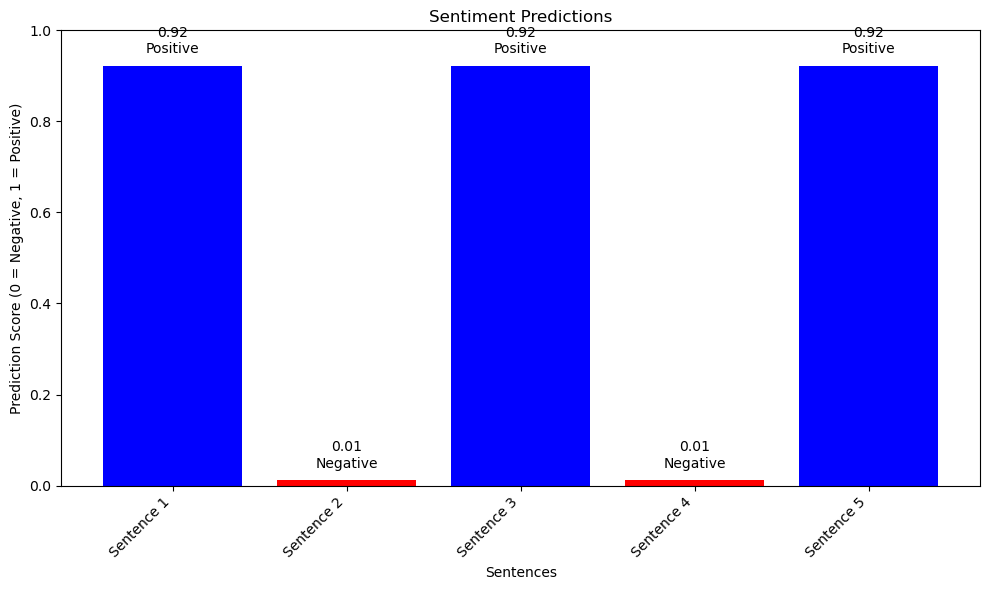

In [43]:
import matplotlib.pyplot as plt

def plot_predictions_with_inputs(sentences):
    # Convert sentences into a TensorFlow tensor
    input_data = tf.constant(sentences)
    predictions = model.predict(input_data).flatten()  # Flatten to a 1D array

    # Convert predictions to binary sentiments
    sentiments = ["Positive" if pred >= 0.5 else "Negative" for pred in predictions]

    # Truncate sentences for better display
    truncated_sentences = [s if len(s) <= 50 else s[:47] + "..." for s in sentences]

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sentences)), predictions, color=['blue' if pred >= 0.5 else 'red' for pred in predictions])
    plt.xticks(range(len(sentences)), [f"Sentence {i+1}" for i in range(len(sentences))], rotation=45)
    plt.ylim(0, 1)
    plt.title("Sentiment Predictions")
    plt.xlabel("Sentences")
    plt.ylabel("Prediction Score (0 = Negative, 1 = Positive)")


    # Annotate predictions on the bars
    for i, (score, sentiment) in enumerate(zip(predictions, sentiments)):
        plt.text(i, score + 0.02, f"{score:.2f}\n{sentiment}", ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Test with multiple sentences
sentences = [
    "The movie was absolutely wonderful, full of great performances.",
    "The film was boring and too slow for my taste.",
    "I loved the story and the characters.",
    "It was a waste of time watching this movie.",
    "Amazing direction and a thrilling plot!"
]

plot_predictions_with_inputs(sentences)
